In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# import modelling libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data

In [2]:
# Load data

df = pd.read_csv('insurance.csv')

# print data
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
815,20,female,31.46,0,no,southeast,1877.9294
144,30,male,28.69,3,yes,northwest,20745.9891
1286,28,female,17.29,0,no,northeast,3732.6251


# Data wrangling

In [3]:
# check for duplicates

df.duplicated().sum()

1

In [4]:
# remove duplicates
df = df.drop_duplicates()
# df.duplicated().sum()

In [5]:
# confirm duplicates
df.duplicated().sum()

0

In [6]:
# check for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA - understanding your data
- Asking data questions

In [7]:
# check number of rows and columns
df.shape

(1337, 7)

In [8]:
# check columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# check for information of your data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
# check description of your data - numeric columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# check data types of your columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Figure size 2160x2160 with 0 Axes>

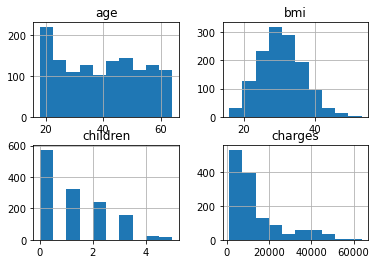

In [12]:
# check for distribution of data
plt.figure(figsize=(30,30))
df.hist()
plt.show()

### 
- There is a normal distribution of age 

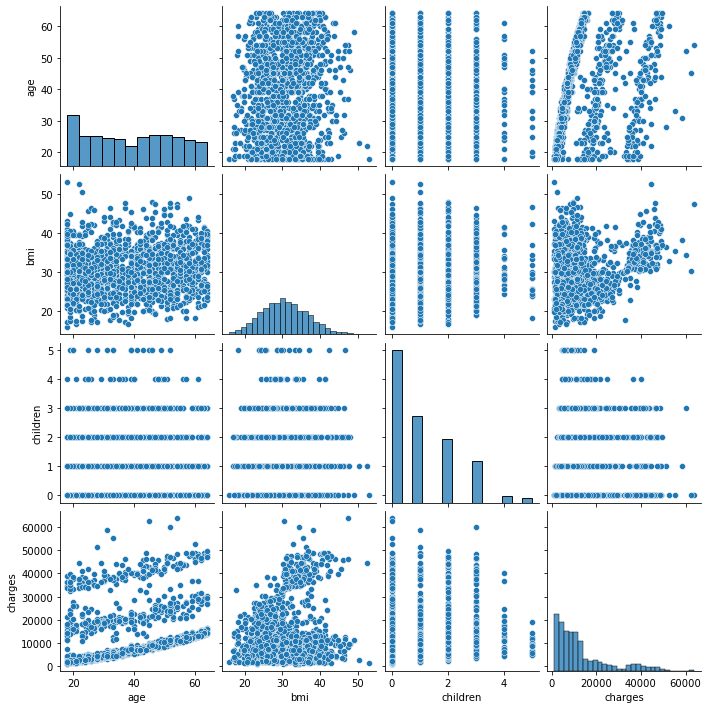

In [13]:
# check for distribution of numerical values
sns.pairplot(df)

# Feature Engineering
- Used to make new features for the betterment of your model
* Transform columns

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# store categorical variables in a variable
cat_cols = [col for col in df if df[col].dtype == 'O']
cat_cols

['sex', 'smoker', 'region']

In [16]:
# check unique columns in cat_cols
for col in df:
    if df[col].dtype == 'O':
        print(f'{col} : {df[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [17]:
# label encoding - biasness
# ordinal encoding -biasness - does best when you have ordinal variables
# one hot encoding - solves the problem of biasness

In [18]:
# use pandas dummies
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [19]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [20]:
# check columns and rows
df.shape

(1337, 12)

In [21]:
# initialize our models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lr = LinearRegression()
xg = XGBRegressor()
neighbors = KNeighborsRegressor()

models = [dt, rf, gb, lr, xg, neighbors]

In [22]:
# split data into train and test 
X = df.drop('charges', axis=1)
y = df.charges

In [25]:
# use cross_val_score 
# use one function to compare the models
    
for model in models:

    cv_score = cross_val_score(model, X, y, cv = 5)

    mean_accuracy = np.mean(cv_score)

    mean_accuracy = mean_accuracy * 100

#     mean_accuracy = round(mean_accuracy, 2)

    print(f"Cross validation accuracies for {model} = {cv_score}")

    print(f"Accuracy % of the {model} {mean_accuracy}")

    print("-----------------------------------------------")

Cross validation accuracies for DecisionTreeRegressor() = [0.74793617 0.6476116  0.69503618 0.71136561 0.73930474]
Accuracy % of the DecisionTreeRegressor() 70.8250859793643
-----------------------------------------------
Cross validation accuracies for RandomForestRegressor() = [0.85380614 0.77985934 0.86984413 0.82911086 0.85710081]
Accuracy % of the RandomForestRegressor() 83.79442565873333
-----------------------------------------------
Cross validation accuracies for GradientBoostingRegressor() = [0.87279429 0.79985623 0.89231318 0.84634567 0.86094725]
Accuracy % of the GradientBoostingRegressor() 85.4451325427345
-----------------------------------------------
Cross validation accuracies for LinearRegression() = [0.76148609 0.70651382 0.77741544 0.73269494 0.7555821 ]
Accuracy % of the LinearRegression() 74.67384760760102
-----------------------------------------------
Cross validation accuracies for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsamp

In [26]:
linear = LinearRegression()

In [27]:
# split data into train and test 
X = df.drop('charges', axis=1)
y = df.charges

In [28]:
cv_scores = cross_val_score(linear, X, y, cv=5)
np.mean(cv_scores)

0.7467384760760102

# Modelling 

In [29]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [30]:
# split data into train and test 
X = df.drop('charges', axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# import modelling libraries
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVC

In [32]:
# initialize our models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lr = LinearRegression()
xg = XGBRegressor()
neighbors = KNeighborsRegressor()

models = [dt, rf, gb, lr, xg, neighbors]

In [35]:
for model in models:
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)
    accuracy = mean_absolute_error(y_test, predicted_y)
    print(f'{model}: {accuracy}')

DecisionTreeRegressor(): 3534.173580186567
RandomForestRegressor(): 2970.7090203496464
GradientBoostingRegressor(): 2781.485510666577
LinearRegression(): 4396.031406695093
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...): 3065.2048346398374
KNeighborsRegressor(): 7018.760075924627
